In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [2]:
# crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-LA-Project/Mar424_converted_77_Features')
# print(crime_df.shape)

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
crime_df=pd.read_csv("Mar424_converted_77_Features", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

# Prepare for Data Training

In [5]:
# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])

In [6]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [7]:
# !pip install xgboost

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

## Drop columns

In [9]:
# Drop all the weather
crime_df=crime_df.drop(['Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure','Total_Precipitation'], axis =1)

# Droop all victim
crime_df=crime_df.drop(['Vict_Sex_M', 'Vict_Sex_X','Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White'], axis =1)

In [10]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Crime_Category', 'Crime_Category_Code', 'Weapon_Reported', 'AREA_2',
       'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9',
       'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15',
       'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4',
       'Day_of_Week_5', 'Day_of_Week_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022', 'Year_2023'],
      dtype='object')

# Data Training

In [11]:
# Selecting predictor and target variables

X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model LR -Without Victim, Weather: lr_wo_victim_weather

In [14]:
# Training the model and predicting- LR-Full data

logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.7217755708170281
Confusion Matrix:
[[135089   1319      4   4227      0    582   2310      0]
 [    58  20723     49      0      0    165  20593      0]
 [  8086   2547     38    104      0  23449   8498      0]
 [ 19648    203      0   5482      0    573    438      0]
 [  4755   2458      6    932      0    241   4932      0]
 [  8091   1890    109   1391      0 220541   4505      0]
 [  4301  14685     69     31      0    875  34419      0]
 [   888   5285     25      0      0      0  12147      0]]



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.75      0.94      0.83    143531
        Fraud and Financial Crimes       0.42      0.50      0.46     41588
              Miscellaneous Crimes       0.13      0.00      0.00     42722
             Robbery and Extortion       0.45      0.21      0.28     26344
                   Sexual Offenses       0.00      0.00      0.00     13324
                Theft and Burglary       0.89      0.93      0.91    236527
     Vandalism and Property Damage       0.39      0.63      0.48     54380
 Violations and Restraining Orders       0.00      0.00      0.00     18345

                          accuracy                           0.72    576761
                         macro avg       0.38      0.40      0.37    576761
                      weighted avg       0.65      0.72      0.67    576761



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.75      0.94      0.83    143531
        Fraud and Financial Crimes       0.42      0.50      0.46     41588
              Miscellaneous Crimes       0.13      0.00      0.00     42722
             Robbery and Extortion       0.45      0.21      0.28     26344
                   Sexual Offenses       0.00      0.00      0.00     13324
                Theft and Burglary       0.89      0.93      0.91    236527
     Vandalism and Property Damage       0.39      0.63      0.48     54380
 Violations and Restraining Orders       0.00      0.00      0.00     18345

                          accuracy                           0.72    576761
                         macro avg       0.38      0.40      0.37    576761
                      weighted avg       0.65      0.72      0.67    576761



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
4   Weapon_Reported    2.298459
1          Vict_Age    0.239967
34          Month_5    0.072653
36          Month_7    0.068299
37          Month_8    0.064001
38          Month_9    0.061605
35          Month_6    0.061048
39         Month_10    0.059523
32          Month_3    0.056273
40         Month_11    0.053326
41         Month_12    0.052002
30    Day_of_Week_6    0.051337
33          Month_4    0.048838
48        Year_2017    0.042320
31          Month_2    0.042002
29    Day_of_Week_5    0.023150
22          AREA_19    0.022185
3               LON    0.019951
46        Year_2015    0.017952
50        Year_2019    0.014710
51        Year_2020    0.012804
47        Year_2016    0.012009
54        Year_2023    0.010930
45        Year_2014    0.009347
52        Year_2021    0.007540
12           AREA_9    0.005895
53        Year_2022   -0.002644
26    Day_of_Week_2   -0.003315
49        Year_2018   -0.004230
25    Day_of_Week_1

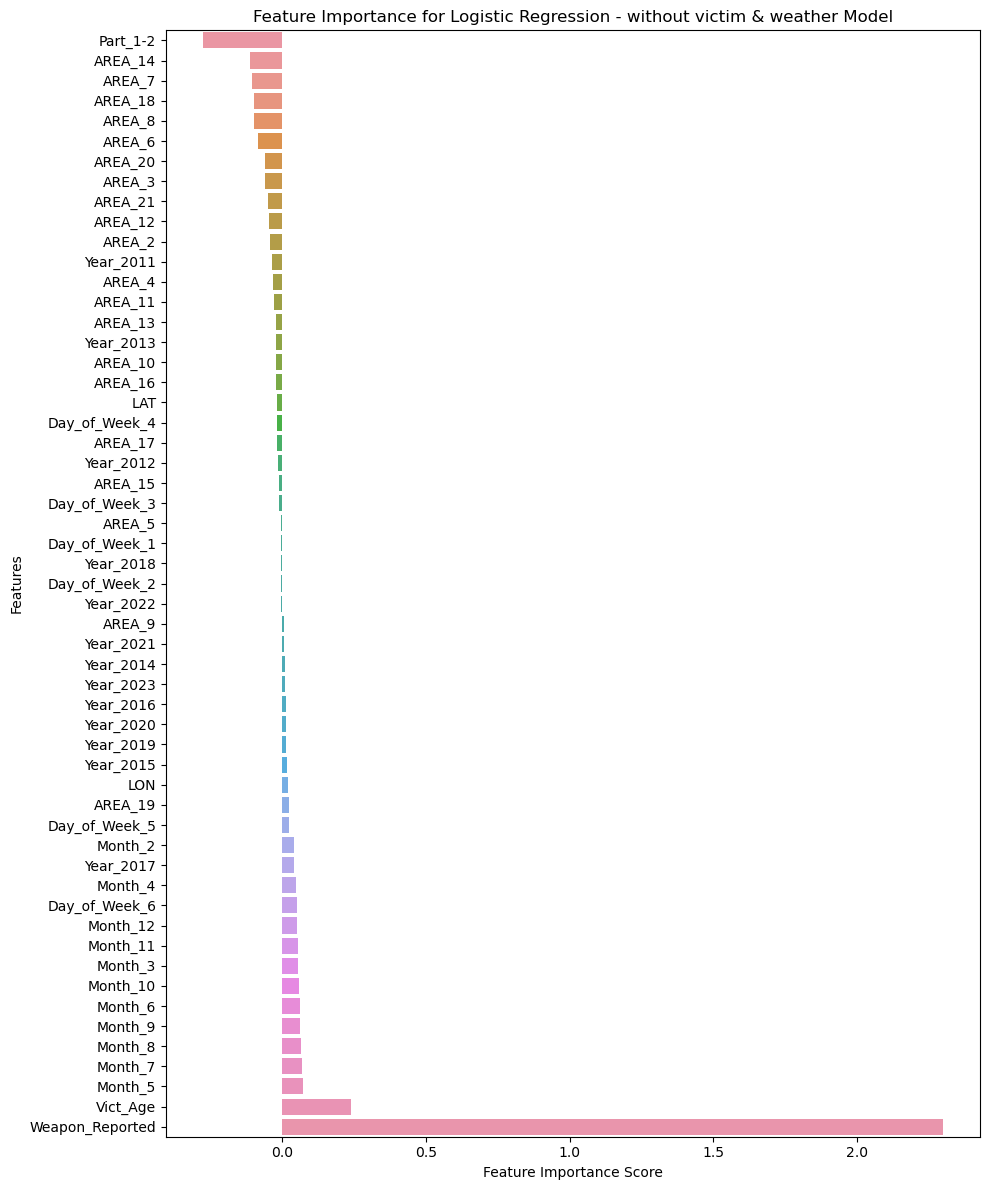

In [17]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression - without victim & weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

## Model XGBOOST Without Victim, Weather: xgb_wo_victim_weather

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")


XGBoost
Accuracy: 0.7394189274240109
Confusion Matrix:
[[133019   1414    834   4697    350   1163   2050      4]
 [    59  23628    320      1    146    218  17139     77]
 [  6882   2649   2905    159    626  23565   5796    140]
 [ 16467    251     17   8198     77    995    336      3]
 [  4454   2845    508    739   1286    257   3216     19]
 [  5353   2078     25   2059     50 223366   3552     44]
 [  4094  15262    362     64    177    948  33204    269]
 [   876   5607    243      0    127     32  10598    862]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.78      0.93      0.85    143531
        Fraud and Financial Crimes       0.44      0.57      0.50     41588
              Miscellaneous Crimes       0.56      0.07      0.12     42722
             Robbery and Extortion       0.52      0.31      0.39     26344
                   Sexual Offenses       0.45      0.10      0.16  

In [19]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
4   Weapon_Reported    0.447428
0          Part_1-2    0.431704
17          AREA_14    0.026430
1          Vict_Age    0.007345
8            AREA_5    0.005956
54        Year_2023    0.003655
50        Year_2019    0.003458
10           AREA_7    0.003350
21          AREA_18    0.003349
30    Day_of_Week_6    0.003304
11           AREA_8    0.003172
52        Year_2021    0.002796
53        Year_2022    0.002780
24          AREA_21    0.002715
49        Year_2018    0.002559
42        Year_2011    0.002450
51        Year_2020    0.002267
18          AREA_15    0.002186
16          AREA_13    0.002095
29    Day_of_Week_5    0.002010
43        Year_2012    0.002003
9            AREA_6    0.001897
15          AREA_12    0.001868
6            AREA_3    0.001858
19          AREA_16    0.001829
23          AREA_20    0.001706
3               LON    0.001649
22          AREA_19    0.001558
7            AREA_4    0.001491
48        Year_2017

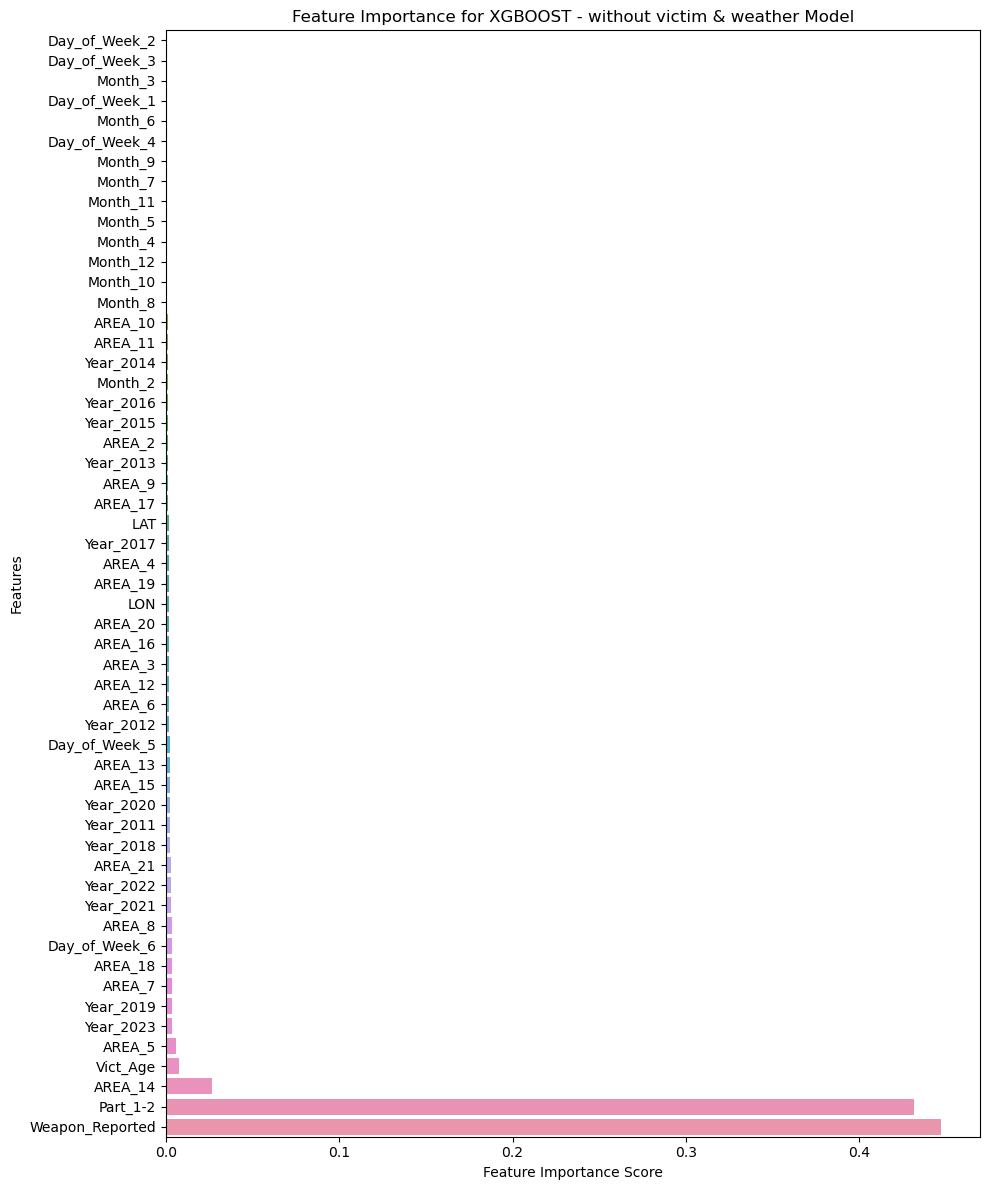

In [20]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - without victim & weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# Model RANDOM FOREST -Without Victim, Weather: rf_wo_victim_weather

In [21]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.7801567720424925
Confusion Matrix:
[[132224   1106    993   5799    383   1239   1647    140]
 [   211  25703    625     18    370    462  13015   1184]
 [  4979   2129  11452    166    338  19431   3743    484]
 [ 11861    175     45  12719    182   1107    235     20]
 [  3446   2012    629    871   3419    341   2391    215]
 [  3731   1746   1477   1951    114 224881   2390    237]
 [  3477  12145   1153     73    373   1135  33966   2058]
 [   815   4176    532      4    163    142   6913   5600]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.82      0.92      0.87    143531
        Fraud and Financial Crimes       0.52      0.62      0.57     41588
              Miscellaneous Crimes       0.68      0.27      0.38     42722
             Robbery and Extortion       0.59      0.48      0.53     26344
                   Sexual Offenses       0.

In [22]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
4   Weapon_Reported    0.243435
0          Part_1-2    0.212931
2               LAT    0.126260
3               LON    0.125488
1          Vict_Age    0.121063
26    Day_of_Week_2    0.007930
27    Day_of_Week_3    0.007918
28    Day_of_Week_4    0.007902
25    Day_of_Week_1    0.007756
37          Month_8    0.006615
35          Month_6    0.006529
33          Month_4    0.006523
34          Month_5    0.006478
39         Month_10    0.006472
32          Month_3    0.006458
36          Month_7    0.006427
38          Month_9    0.006324
40         Month_11    0.006133
41         Month_12    0.005965
31          Month_2    0.005901
29    Day_of_Week_5    0.005715
30    Day_of_Week_6    0.004653
47        Year_2016    0.004456
45        Year_2014    0.004373
48        Year_2017    0.004342
46        Year_2015    0.004246
44        Year_2013    0.003984
49        Year_2018    0.003921
42        Year_2011    0.003826
43        Year_2012

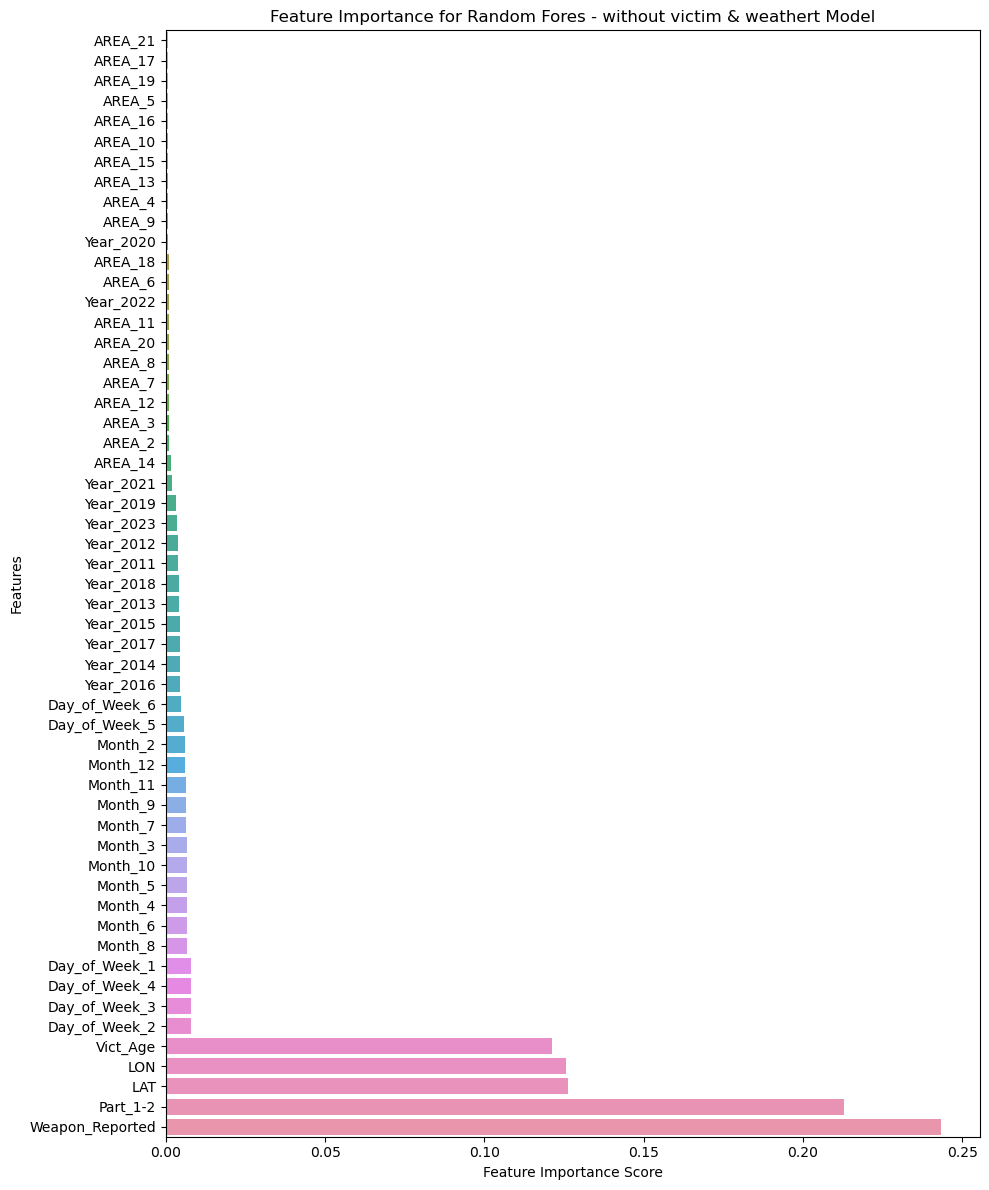

In [23]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Fores - without victim & weathert Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# Model KNN7 -Without Victim, Weather: knn_wo_victim_weather

In [22]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.7171930834435755
Confusion Matrix:
[[130693   1492    671   6766    368   1767   1609    165]
 [   682  23358   1061     26    662    668  13612   1519]
 [  7267   3866   2738    201    304  23335   4441    570]
 [ 16300    273     60   7685    252   1480    256     38]
 [  4370   3188    393   1024    694    428   2906    321]
 [  5473   2445   2071   2044    217 221572   2390    315]
 [  4961  17699   1896     76    819   1710  24770   2449]
 [  1147   6391    726     15    323    297   7307   2139]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.76      0.91      0.83    143531
        Fraud and Financial Crimes       0.40      0.56      0.47     41588
              Miscellaneous Crimes       0.28      0.06      0.10     42722
             Robbery and Extortion       0.43      0.29      0.35     26344
                   Sexual Offenses       0.19      0.05      0.08     1

In [23]:
# Take too long, not not sure it's work or not?

# from sklearn.inspection import permutation_importance
# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [24]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (2883802, 55)
Index(['Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Weapon_Reported', 'AREA_2',
       'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9',
       'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15',
       'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4',
       'Day_of_Week_5', 'Day_of_Week_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022', 'Year_2023'],
      dtype='object')
